### AR 자기 회귀 모형
* https://byeongkijeong.github.io/ARIMA-with-Python/

In [10]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import FinanceDataReader as fdr

In [2]:
def gen_arma_samples (ar,ma,nobs):
    arma_model = sm.tsa.ArmaProcess(ar=ar, ma=ma)
    arma_samples = arma_model.generate_sample(nobs)
    return arma_samples

In [3]:
def gen_random_walk_w_drift(nobs,drift):
    init = np.random.normal(size=1, loc=0)
    e = np.random.normal(size=nobs, scale=1)
    y = np.zeros(nobs)
    y[0] = init
    for t in (1,nobs):
        y[t] = drift + 1*y[t-1] + e[t]
        return y

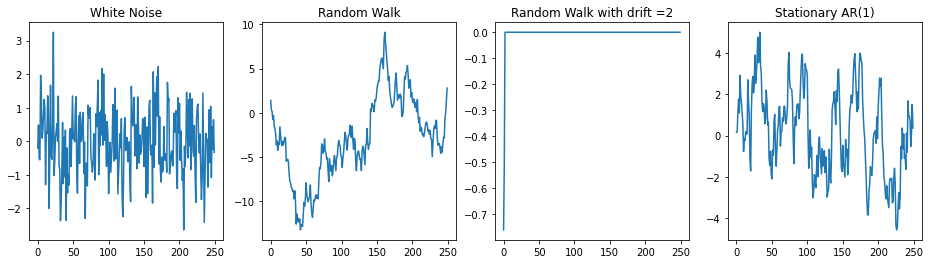

In [4]:
np.random.seed(12345)  #난수지정

white_noise = gen_arma_samples(ar=[1],ma=[1],nobs=250)
random_walk = gen_arma_samples(ar = [1,-1], ma=[1], nobs=250)
random_walk_w_drift = gen_random_walk_w_drift(250,2)
stationary_ar_1 = gen_arma_samples(ar=[1,-0.9], ma=[1], nobs=250)

fig,ax = plt.subplots(1,4)
ax[0].plot(white_noise)
ax[0].set_title('White Noise')

ax[1].plot(random_walk)
ax[1].set_title('Random Walk')

ax[2].plot(random_walk_w_drift)
ax[2].set_title('Random Walk with drift =2')

ax[3].plot(stationary_ar_1)
ax[3].set_title('Stationary AR(1)')

fig.set_size_inches(16,4)


Text(0.5, 1.0, 'Close Price for samsung')

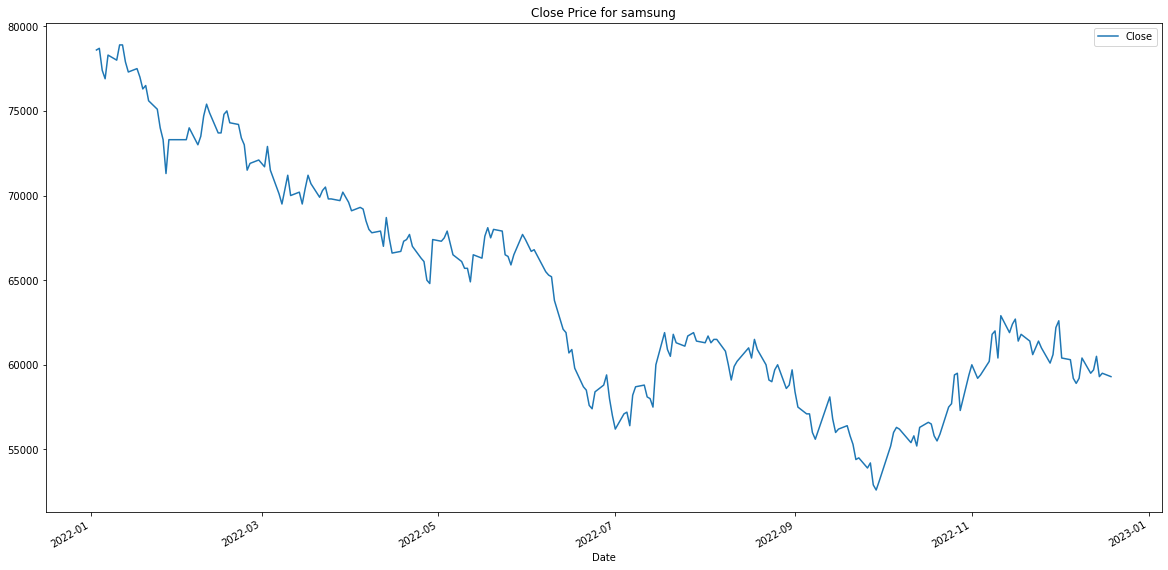

In [17]:
df_samsung = fdr.DataReader(symbol='005930', start='2022')
# df_samsung
df_samsung[['Close']].plot(figsize=(20,10))
plt.title('Close Price for samsung')

In [67]:
series = pd.Series(df_samsung.Close.index[0:30])
# series

In [68]:
series = series.apply(lambda x: x.day)

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
import statsmodels.api as sm

model = sm.tsa.ARIMA(series, order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Date   No. Observations:                   29
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -87.043
Method:                       css-mle   S.D. of innovations              4.867
Date:                Mon, 19 Dec 2022   AIC                            180.086
Time:                        13:32:23   BIC                            184.188
Sample:                             1   HQIC                           181.370
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4477      0.890      0.503      0.615      -1.297       2.193
ma.L1.D.Date    -0.0156      0.201     -0.077      0.938      -0.410       0.378
                                    Roots   

In [64]:
model_2 = sm.tsa.arima.ARIMA(series, order=(1,1,1))
model_fit_2 = model_2.fit()
print(model_fit_2.summary())

                               SARIMAX Results                                
Dep. Variable:                   Date   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -86.627
Date:                Mon, 19 Dec 2022   AIC                            179.255
Time:                        13:31:30   BIC                            183.357
Sample:                             0   HQIC                           180.540
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8503      0.852      0.998      0.319      -0.820       2.521
ma.L1         -0.9998    125.236     -0.008      0.994    -246.459     244.459
sigma2        22.0865   2759.541      0.008      0.9

In [65]:
model_3 = sm.tsa.arima.ARIMA(series, order=(1,1,0))
model_fit_3 = model_3.fit()
print(model_fit_3.summary())

                               SARIMAX Results                                
Dep. Variable:                   Date   No. Observations:                   30
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -87.168
Date:                Mon, 19 Dec 2022   AIC                            178.336
Time:                        13:31:35   BIC                            181.070
Sample:                             0   HQIC                           179.192
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0056      1.013     -0.006      0.996      -1.992       1.980
sigma2        23.8957      2.737      8.731      0.000      18.531      29.260
Ljung-Box (L1) (Q):                   0.00   Jarque-

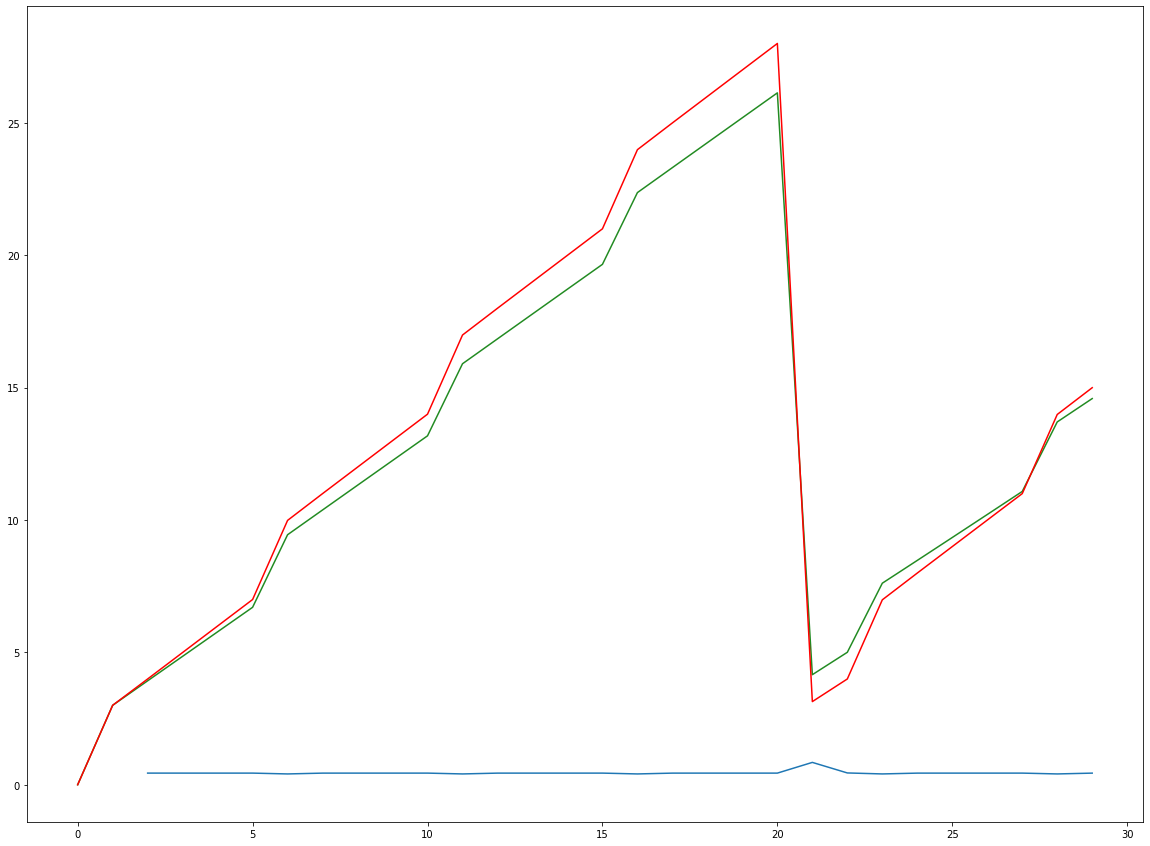

In [70]:
plt.figure(figsize=(20,15))
plt.plot(model_fit.predict())
plt.plot(model_fit_2.predict(), color = 'forestgreen')
plt.plot(model_fit_3.predict(),color = 'r')
plt.show()

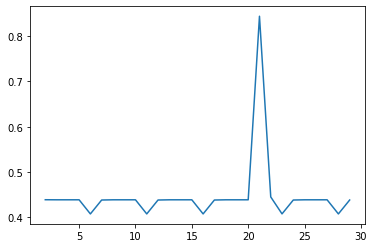

In [71]:
plt.plot(model_fit.predict())